# Problem 5.52

This problem is very similar to what we did in the text, but with an extension that I want to do.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def p(v,t):
    return 8*t/(3*v-1)-3/v**2

Text(0.5, 0, '$V/V_c$')

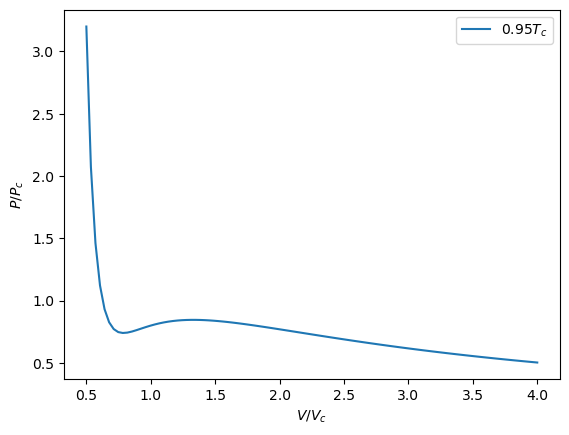

In [4]:
v = np.linspace(0.5, 4, 100)

fig0 = plt.figure()
ax0 = fig0.add_subplot(111)

## THIS IS THE ONE CHANGE FROM WHAT WE DID ##
ax0.plot(v, p(v,0.95), label=r'$0.95T_c$')

ax0.legend()

ax0.set_ylabel(r'$P/P_c$')
ax0.set_xlabel(r'$V/V_c$')

OK, so I'm going to make a dataframe with that information in it first. 

In [5]:
df = pd.DataFrame({'v/vc':v,
                   '0.95Tc p/pc':p(v,0.95),
                  })

And nown I'm going to add the Gibbs Free Energy at 0.95 Tc.

In [7]:
df['0.95Tc G'] = -0.95*np.log(3*df['v/vc']-1)+.95/(3*df['v/vc']-1)-9/4/df['v/vc']

And now let's look at what we have.

In [8]:
df

,v/vc,0.95Tc p/pc,0.95Tc G
0,0.500000,3.200000,-1.941510
1,0.535354,2.072574,-2.159594
2,0.570707,1.461596,-2.285904
3,0.606061,1.121389,-2.360752
4,0.641414,0.930992,-2.405163
...,...,...,...
95,3.858586,0.517129,-2.733923
96,3.893939,0.513636,-2.739001
97,3.929293,0.510186,-2.744062
98,3.964646,0.506777,-2.749108


Now, let's plot G vs p like he did in the textbook (Figure 5.21 in my book and the notes)

Text(0, 0.5, 'Gibbs Free Energy')

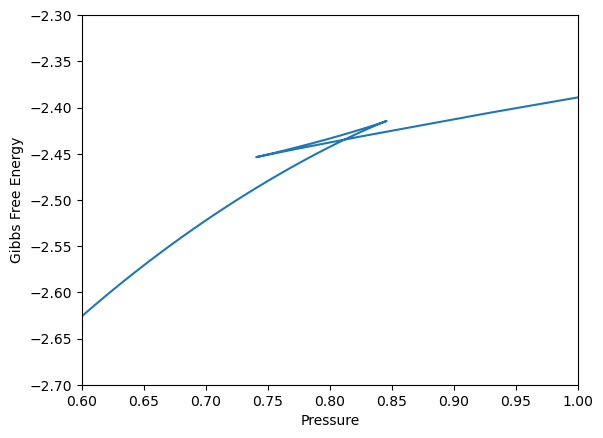

In [14]:
fig1, ax1 = plt.subplots()

ax1.plot(df['0.95Tc p/pc'], df['0.95Tc G'])
ax1.set_xlim(0.6, 1)
ax1.set_ylim(-2.7, -2.3)
ax1.set_xlabel('Pressure')
ax1.set_ylabel('Gibbs Free Energy')

So that looks like it happens at about 0.82 or somewhere thereabouts. But let's do the integral trick to see if that works. 

So the idea was to plot VOLUME vs. PRESSURE and then take a bunch of integrals and add them to be zero. let's start with a plot.

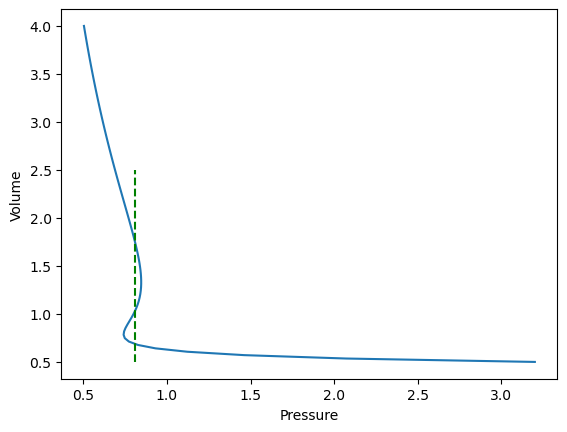

In [22]:
fig2, ax2 = plt.subplots()

ax2.plot(df['0.95Tc p/pc'], df['v/vc'])
ax2.set_xlabel('Pressure')
ax2.set_ylabel('Volume')

ax2.vlines(0.81, 0.5, 2.5, 'green', 'dashed')

So we want the integral of volume with respect to pressure on one side of that line to equal the same integral on the other side of that line.